In [48]:
import urllib.request
import tarfile
import os
from pylab import *
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from io import StringIO 
import pydot
from IPython.display import Image
from sklearn import tree

In [49]:
def get_data_and_target(df, features, target):
    return {"data":df[features],"target":df[target]}

In [50]:
def train_test_split_pd(data, target, test_size):
    mask = np.random.rand(len(data)) < test_size
    return data[mask], data[~mask], target[mask], target[~mask]

In [51]:
df0 = pd.read_csv("data/QN_final.csv", index_col=0)

In [52]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,125,150,200,State,CountyName,rent0,rent1,rent2,rent3,rent4
0,167,11372,2011,24068,2016,958,1437,1243,1467,1746,...,874,655,600,36,Queens County,1100,1180,1330,1650,1820
1,7,11004,2011,5131,149,221,163,130,252,271,...,614,476,244,36,Queens County,1130,1200,1360,1690,1870
2,0,11040,2011,13438,230,313,281,509,499,219,...,1426,1822,1701,36,Queens County,1440,1530,1730,2140,2370
3,8,11426,2011,6018,163,89,181,141,225,181,...,485,557,383,36,Queens County,1180,1260,1420,1760,1950
4,20,11365,2011,15106,972,713,712,886,665,812,...,786,876,561,36,Queens County,1210,1290,1460,1810,2000


In [53]:
df0.columns

Index(['trips', 'ZIP', 'year', 'total', '0', '10', '15', '20', '25', '30',
       '35', '40', '45', '50', '60', '75', '100', '125', '150', '200', 'State',
       'CountyName', 'rent0', 'rent1', 'rent2', 'rent3', 'rent4'],
      dtype='object')

In [54]:
features = ['0', '10', '15', '20', '25', '30', '35', '40', '45', '50', '60', '75', '100', '125', '150', '200', 'rent0', 'rent1', 'rent2', 'rent3', 'rent4']
target = "trips"

In [55]:
temp = get_data_and_target(df0, features, target)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp["data"], temp["target"], 0.7)

In [57]:
def fit_tree(X, y, depth=10):
    ##: Using the DecisionTreeRegressor, train a model to depth 10.
    decision_tree = tree.DecisionTreeRegressor(max_depth=depth)
    return decision_tree.fit(X,y)

def display_tree(tmodel):
    dot_data = StringIO() 
    tree.export_graphviz(tmodel, out_file=dot_data) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

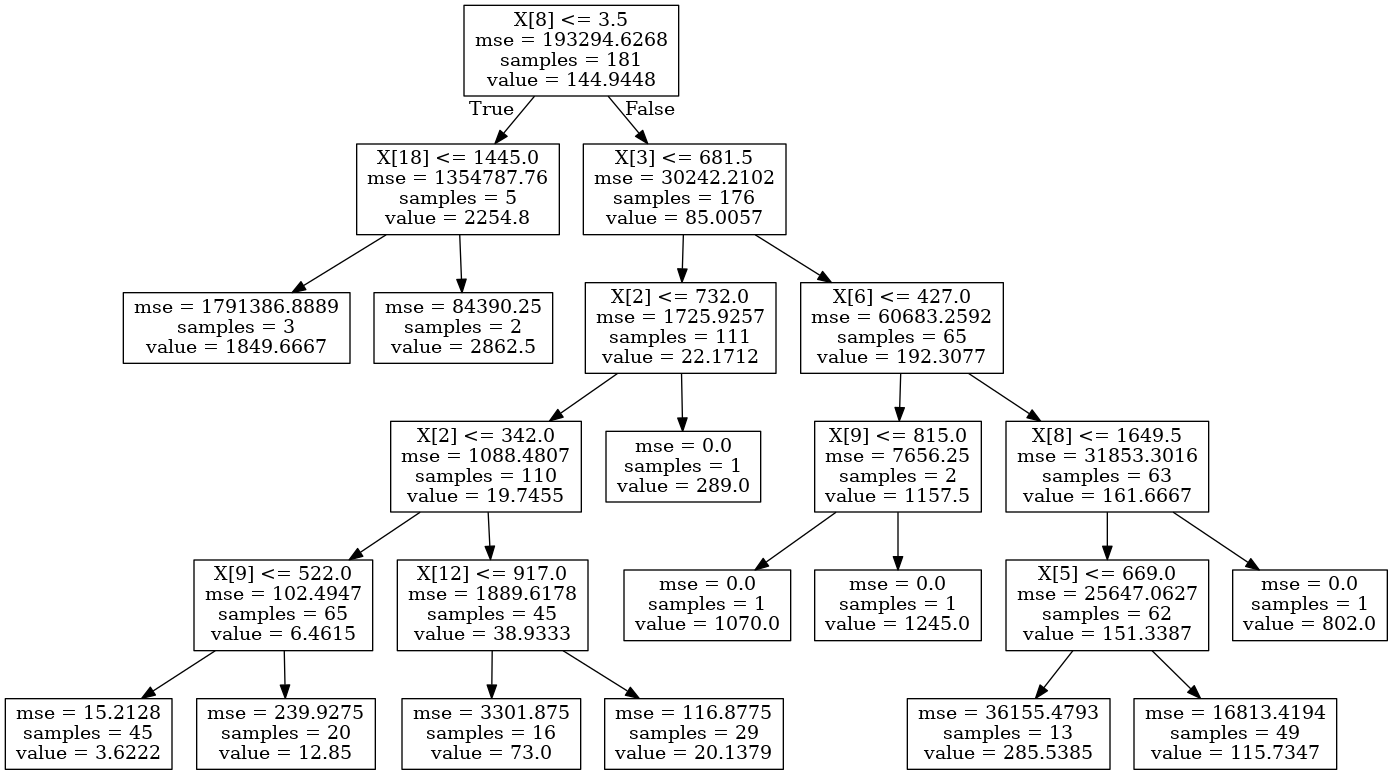

In [58]:
tmodel = fit_tree(X_train, Y_train, 5)
display_tree(tmodel)

In [59]:
pd.DataFrame(tmodel.feature_importances_, X_train.columns)

,0
0,0.000000
10,0.000000
15,0.003556
20,0.042247
25,0.000000
30,0.010547
35,0.068440
40,0.000000
45,0.829769
50,0.000587


Not much going on here, but we gotta do something

In [60]:
importances = tmodel.feature_importances_
important = [i for i in range(len(importances)) if importances[i] > 0.01]

In [61]:
decisiontreeFeatures=X_train.columns[important]

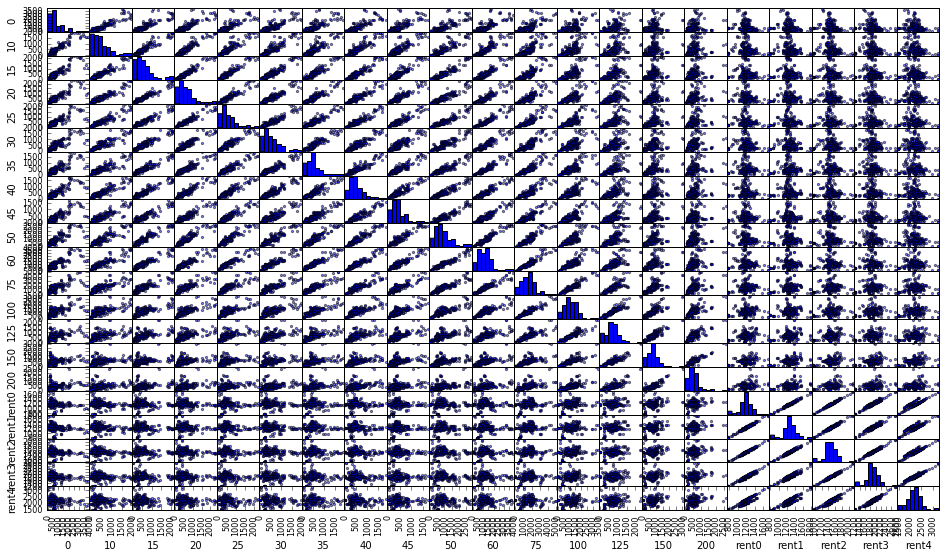

In [62]:
pd.scatter_matrix(X_train, figsize=(16,9))
plt.show()

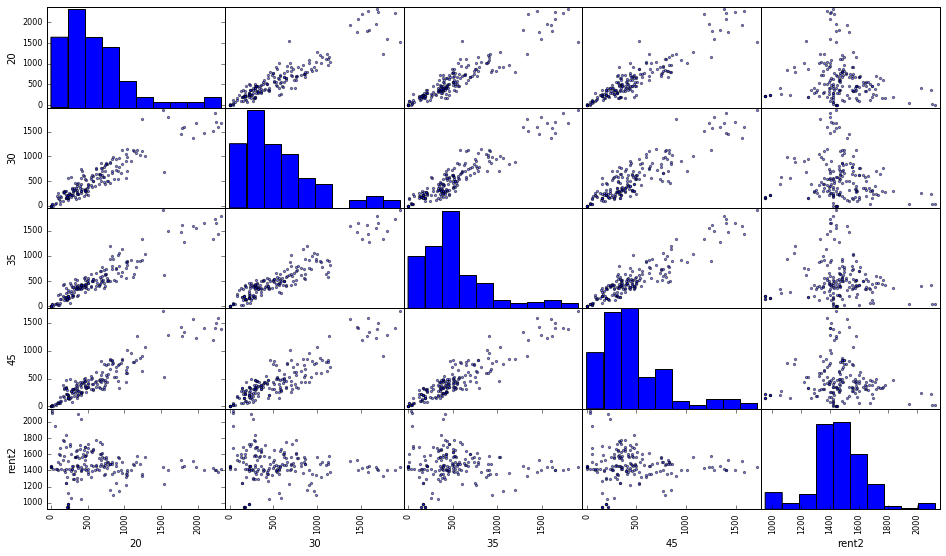

In [63]:
pd.scatter_matrix(X_train[decisiontreeFeatures], figsize=(16,9))
plt.show()

In [64]:
legit = get_data_and_target(df0, decisiontreeFeatures, target)

In [65]:
legit["data"].head()

,20,30,35,45,rent2
0,1243,1746,1330,900,1330
1,130,271,165,199,1360
2,509,219,455,344,1730
3,141,181,141,106,1420
4,886,812,765,638,1460


In [66]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_knn = KNeighborsClassifier(n_neighbors=20)
clf_log = LogisticRegression(C=1e5)
clf_lin = LinearRegression()
clf_rnf = RandomForestClassifier(n_estimators=100)

In [75]:
scores_svm = cross_val_score(clf_svm, legit["data"].values, legit["target"].values, cv=11)
scores_knn = cross_val_score(clf_knn, legit["data"].values, legit["target"].values, cv=11)
scores_log = cross_val_score(clf_log, legit["data"].values, legit["target"].values, cv=11)
scores_lin = cross_val_score(clf_lin, legit["data"].values, legit["target"].values, cv=11)
scores_rnf = cross_val_score(clf_rnf, legit["data"].values, legit["target"].values, cv=11)
scores_rnf_all_vectors = cross_val_score(clf_rnf, temp["data"].values, temp["target"].values, cv=11)


/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-p

In [76]:
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf.mean(), scores_rnf.std() * 2))
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf_all_vectors.mean(), scores_rnf_all_vectors.std() * 2))

Accuracy SVM: 0.09 (+/- 0.18)
Accuracy KNN: 0.17 (+/- 0.29)
Accuracy LOG: 0.12 (+/- 0.28)
Accuracy LIN: -1.48 (+/- 5.81)
Accuracy RNF: 0.11 (+/- 0.32)
Accuracy RNF: 0.11 (+/- 0.32)


> All of these are bad for our data

> rent and income have no influence in trips. But, let's use KNN, logistic, and linear

In [69]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split_pd(legit["data"], legit["target"], 0.8)

In [70]:
knn = clf_knn.fit(X1_train.values, Y1_train.values)
lin = clf_lin.fit(X1_train.values, Y1_train.values)
log = clf_log.fit(X1_train.values, Y1_train.values)

In [71]:
predicted_knn = knn.predict(X1_test.values)
predicted_lin = lin.predict(X1_test.values)
predicted_log = log.predict(X1_test.values)

In [72]:
print("Test VS KNN Predictions")
pd.DataFrame(predicted_knn, Y1_test.values)

Test VS KNN Predictions


,0
14,0
46,59
13,0
13,17
450,2
1,0
59,19
6,0
38,19
17,9


In [73]:
print("Test VS Logistic Predictions")
pd.DataFrame(predicted_log, Y1_test.values)

Test VS Logistic Predictions


,0
14,0
46,36
13,0
13,7
450,2
1,0
59,8
6,0
38,7
17,19


In [74]:
print("Test VS Linear Predictions")
pd.DataFrame(predicted_lin, Y1_test.values)

Test VS Linear Predictions


,0
14,152.304883
46,135.899104
13,129.705821
13,140.242432
450,168.059564
1,118.400525
59,149.865080
6,156.564824
38,162.429376
17,135.800893


> Rent and income have no effect on the number of trips in an area.

> But what about rent prices? Are they affected by incomes in an area?

In [78]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,125,150,200,State,CountyName,rent0,rent1,rent2,rent3,rent4
0,167,11372,2011,24068,2016,958,1437,1243,1467,1746,...,874,655,600,36,Queens County,1100,1180,1330,1650,1820
1,7,11004,2011,5131,149,221,163,130,252,271,...,614,476,244,36,Queens County,1130,1200,1360,1690,1870
2,0,11040,2011,13438,230,313,281,509,499,219,...,1426,1822,1701,36,Queens County,1440,1530,1730,2140,2370
3,8,11426,2011,6018,163,89,181,141,225,181,...,485,557,383,36,Queens County,1180,1260,1420,1760,1950
4,20,11365,2011,15106,972,713,712,886,665,812,...,786,876,561,36,Queens County,1210,1290,1460,1810,2000


In [79]:
df0['Rent_Mean'] = df0[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df0['Rent_Median'] = df0[["rent0", "rent1","rent2", "rent3","rent4"]].median(numeric_only=True,axis=1)

In [80]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,200,State,CountyName,rent0,rent1,rent2,rent3,rent4,Rent_Mean,Rent_Median
0,167,11372,2011,24068,2016,958,1437,1243,1467,1746,...,600,36,Queens County,1100,1180,1330,1650,1820,1416.0,1330.0
1,7,11004,2011,5131,149,221,163,130,252,271,...,244,36,Queens County,1130,1200,1360,1690,1870,1450.0,1360.0
2,0,11040,2011,13438,230,313,281,509,499,219,...,1701,36,Queens County,1440,1530,1730,2140,2370,1842.0,1730.0
3,8,11426,2011,6018,163,89,181,141,225,181,...,383,36,Queens County,1180,1260,1420,1760,1950,1514.0,1420.0
4,20,11365,2011,15106,972,713,712,886,665,812,...,561,36,Queens County,1210,1290,1460,1810,2000,1554.0,1460.0


In [81]:
income_cols = ["0", "10", "15", "20", "25", "30", "35", "40", "45", "50", "60", "75", "100", "125", "150", "200"]
target_rent = "Rent_Mean"

In [82]:
temp_income = get_data_and_target(df0, income_cols, target_rent)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split_pd(temp_income["data"], temp_income["target"], 0.7)

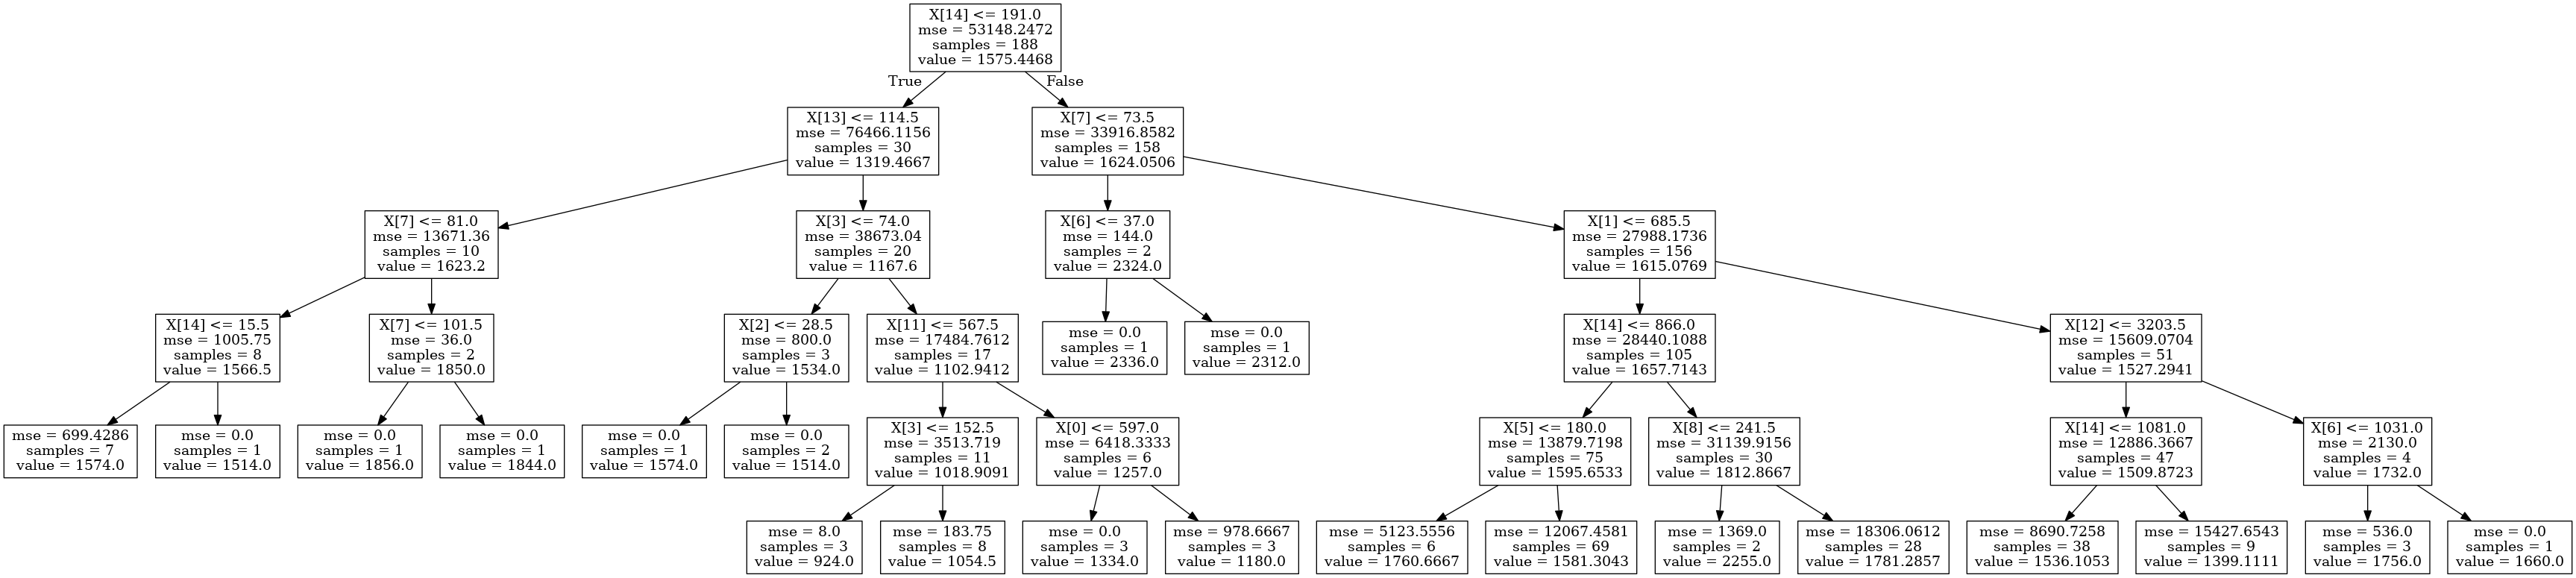

In [86]:
tmodel = fit_tree(X_train, Y_train, 5)
display_tree(tmodel)

In [87]:
pd.DataFrame(tmodel.feature_importances_, X_train.columns)

,0
0,0.004374
10,0.071790
15,0.000295
20,0.062827
25,0.000000
30,0.021835
35,0.000885
40,0.137842
45,0.051504
50,0.000000


In [89]:
importances = tmodel.feature_importances_
important = [i for i in range(len(importances)) if importances[i] > 0.1]
decisiontreeFeatures=X_train.columns[important]
decisiontreeFeatures

Index(['40', '125', '150'], dtype='object')

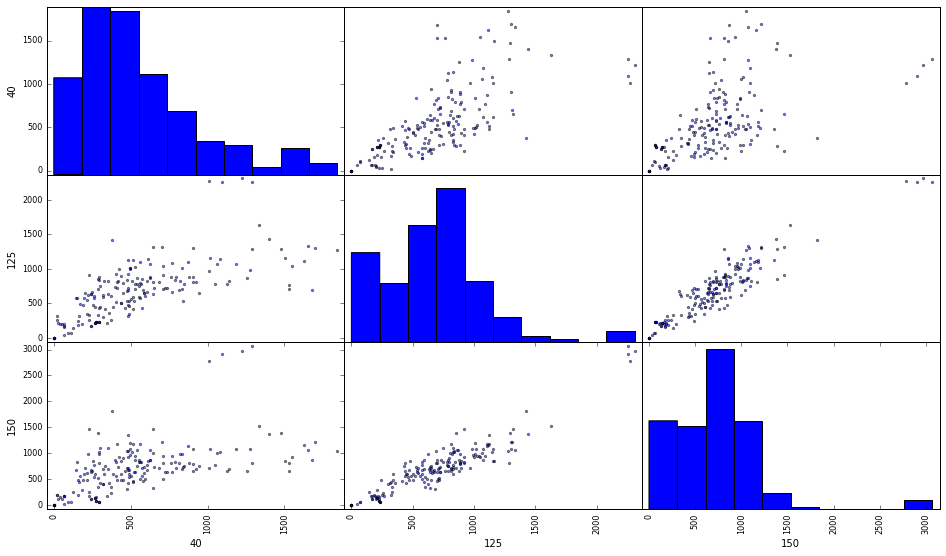

In [90]:
pd.scatter_matrix(X_train[decisiontreeFeatures], figsize=(16,9))
plt.show()

In [91]:
legit = get_data_and_target(df0, decisiontreeFeatures, target)
legit["data"].head()

,40,125,150
0,1255,874,655
1,109,614,476
2,380,1426,1822
3,172,485,557
4,530,786,876


In [93]:
scores_svm = cross_val_score(clf_svm, legit["data"].values, legit["target"].values, cv=11)
scores_knn = cross_val_score(clf_knn, legit["data"].values, legit["target"].values, cv=11)
scores_log = cross_val_score(clf_log, legit["data"].values, legit["target"].values, cv=11)
scores_lin = cross_val_score(clf_lin, legit["data"].values, legit["target"].values, cv=11)
scores_rnf = cross_val_score(clf_rnf, legit["data"].values, legit["target"].values, cv=11)
scores_rnf_all_vectors = cross_val_score(clf_rnf, temp_income["data"].values, temp_income["target"].values, cv=11)

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-p

In [94]:
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf.mean(), scores_rnf.std() * 2))
print("Accuracy RNF: %0.2f (+/- %0.2f)" % (scores_rnf_all_vectors.mean(), scores_rnf_all_vectors.std() * 2))

Accuracy SVM: 0.13 (+/- 0.18)
Accuracy KNN: 0.12 (+/- 0.24)
Accuracy LOG: 0.08 (+/- 0.24)
Accuracy LIN: -2.35 (+/- 9.42)
Accuracy RNF: 0.05 (+/- 0.12)
Accuracy RNF: 0.23 (+/- 0.56)


In [95]:
scores_svm = cross_val_score(clf_svm, temp_income["data"].values, temp_income["target"].values, cv=11)
scores_knn = cross_val_score(clf_knn, temp_income["data"].values, temp_income["target"].values, cv=11)
scores_log = cross_val_score(clf_log, temp_income["data"].values, temp_income["target"].values, cv=11)
scores_lin = cross_val_score(clf_lin, temp_income["data"].values, temp_income["target"].values, cv=11)
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LOG: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy LIN: %0.2f (+/- %0.2f)" % (scores_lin.mean(), scores_lin.std() * 2)) #what?

/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/home/stuff/anaconda3/envs/DataScience-Project/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)


Accuracy SVM: 0.10 (+/- 0.28)
Accuracy KNN: 0.18 (+/- 0.59)
Accuracy LOG: 0.04 (+/- 0.10)
Accuracy LIN: -0.05 (+/- 0.51)


In [96]:
df0.head()

,trips,ZIP,year,total,0,10,15,20,25,30,...,200,State,CountyName,rent0,rent1,rent2,rent3,rent4,Rent_Mean,Rent_Median
0,167,11372,2011,24068,2016,958,1437,1243,1467,1746,...,600,36,Queens County,1100,1180,1330,1650,1820,1416.0,1330.0
1,7,11004,2011,5131,149,221,163,130,252,271,...,244,36,Queens County,1130,1200,1360,1690,1870,1450.0,1360.0
2,0,11040,2011,13438,230,313,281,509,499,219,...,1701,36,Queens County,1440,1530,1730,2140,2370,1842.0,1730.0
3,8,11426,2011,6018,163,89,181,141,225,181,...,383,36,Queens County,1180,1260,1420,1760,1950,1514.0,1420.0
4,20,11365,2011,15106,972,713,712,886,665,812,...,561,36,Queens County,1210,1290,1460,1810,2000,1554.0,1460.0
